# Linear Regression 

Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Data Loading and Preprocessing

In [2]:
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


For now we are dropiing column 'Region'

In [3]:
df = df.drop(['Region'], axis=1)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [5]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [6]:
print(df.corr())

                 population  fertility       HIV       CO2  BMI_male  \
population         1.000000  -0.061345 -0.065821 -0.010147 -0.134905   
fertility         -0.061345   1.000000  0.292695 -0.439747 -0.715380   
HIV               -0.065821   0.292695  1.000000 -0.165889 -0.308700   
CO2               -0.010147  -0.439747 -0.165889  1.000000  0.581031   
BMI_male          -0.134905  -0.715380 -0.308700  0.581031  1.000000   
GDP               -0.045687  -0.502615 -0.208410  0.823099  0.625126   
BMI_female        -0.135149   0.527314  0.396680 -0.280813 -0.447049   
life              -0.005051  -0.786921 -0.604749  0.476666  0.731559   
child_mortality    0.008058   0.901704  0.394913 -0.458186 -0.749691   

                      GDP  BMI_female      life  child_mortality  
population      -0.045687   -0.135149 -0.005051         0.008058  
fertility       -0.502615    0.527314 -0.786921         0.901704  
HIV             -0.208410    0.396680 -0.604749         0.394913  
CO2        

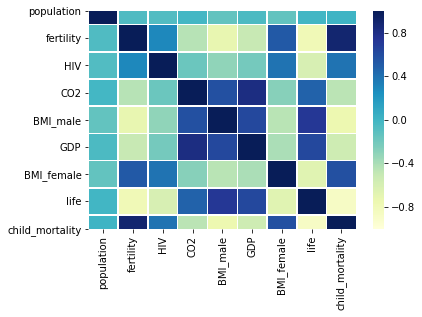

In [7]:
#sns.set()
sns.heatmap(df.corr(), vmin=-1,vmax=1, linewidths=0.5, cmap="YlGnBu")
plt.margins(0.2)
plt.show()

Here as we can observe from graph 📊 that our output label is 'life' and rest all are features.
Life is positively co-related to the - CO2, BMI_male, GDP
and negatively co-related to the rest others.


Separation of features and labels

In [8]:
X = df.drop(['life'], axis=1).values
y = df['life'].values

In [9]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(139, 8) (139,)


Spliting data into training and testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Modeling

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting 

In [13]:
# Train data prediction
y_pred_train = model.predict(X_train)

# Train data prediction
y_pred_test = model.predict(X_test) 

Evaluation 

In [14]:
# R² value
print("R² for training data : {}".format(model.score(X_train, y_train)))
print("R² for testing data : {}".format(model.score(X_test, y_test)))

R² for training data : 0.9076273328983272
R² for testing data : 0.8380468731430135


In [15]:
# RMSE matric 
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print('Root Mean Square Error :- ')
print('rmse for training data : {}'.format(rmse_train))
print('rmse for testing data : {}'.format(rmse_test))

Root Mean Square Error :- 
rmse for training data : 2.8779255622795126
rmse for testing data : 3.2476010800369455


Cross-Validation 
5-fold cross validation || 5-cv

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
new_model  = LinearRegression()

In [18]:
cv_scores = cross_val_score(new_model, X, y)

In [19]:
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [20]:
print('Avg. score of 5-CV model :- {}'.format(np.mean(cv_scores)))

Avg. score of 5-CV model :- 0.8599627722793451


More number of cross folds we use, the more computationally expensive cross-validation becomes.

In [21]:
# comparison between 3 and 10-fold CV

# Perform 3-fold CV
cvscores_3 = cross_val_score(new_model, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(new_model, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782622262
0.8436128620131266


In [27]:
%timeit cross_val_score(new_model, X, y, cv = 3)

7.06 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit cross_val_score(new_model, X, y, cv = 10)

23.1 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
